# Exploratory data analysis

## Importing libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Loading the data

In [2]:
df = pd.read_csv('../data/raw/framingham.csv')

## Summary statistics

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Data cleaning and preparation

Now we know the characteristics of the data, we can start to explore the data by seeing how much of the data is missing.

In [6]:
def missing_perc(df):
    for col in df.columns:
        per = df[col].isna().mean() * 100
        if (per != 0):
            print('{} => {}%'.format(col, round(per,2)))
            
missing_perc(df)

education => 2.48%
cigsPerDay => 0.68%
BPMeds => 1.25%
totChol => 1.18%
BMI => 0.45%
heartRate => 0.02%
glucose => 9.15%


<Axes: >

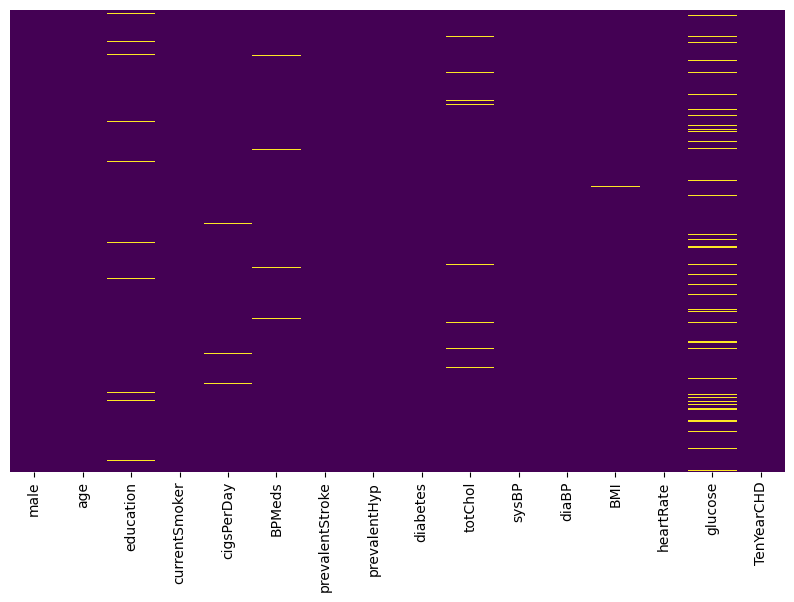

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

The data has a multiple nan values so I will drop the ones with less than 5% of the data and will fill the missing data with knn imputation. With some functions contained in clean_data.py.

In [8]:
nonaknn = pd.read_csv('../data/processed/nonaknn.csv')

In [9]:
nonaknn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3989 non-null   int64  
 1   age              3989 non-null   int64  
 2   education        3989 non-null   float64
 3   currentSmoker    3989 non-null   int64  
 4   cigsPerDay       3989 non-null   float64
 5   BPMeds           3989 non-null   float64
 6   prevalentStroke  3989 non-null   int64  
 7   prevalentHyp     3989 non-null   int64  
 8   diabetes         3989 non-null   int64  
 9   totChol          3989 non-null   float64
 10  sysBP            3989 non-null   float64
 11  diaBP            3989 non-null   float64
 12  BMI              3989 non-null   float64
 13  heartRate        3989 non-null   float64
 14  glucose          3989 non-null   float64
 15  TenYearCHD       3989 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 498.8 KB


Now let's see the distribution of the variables.

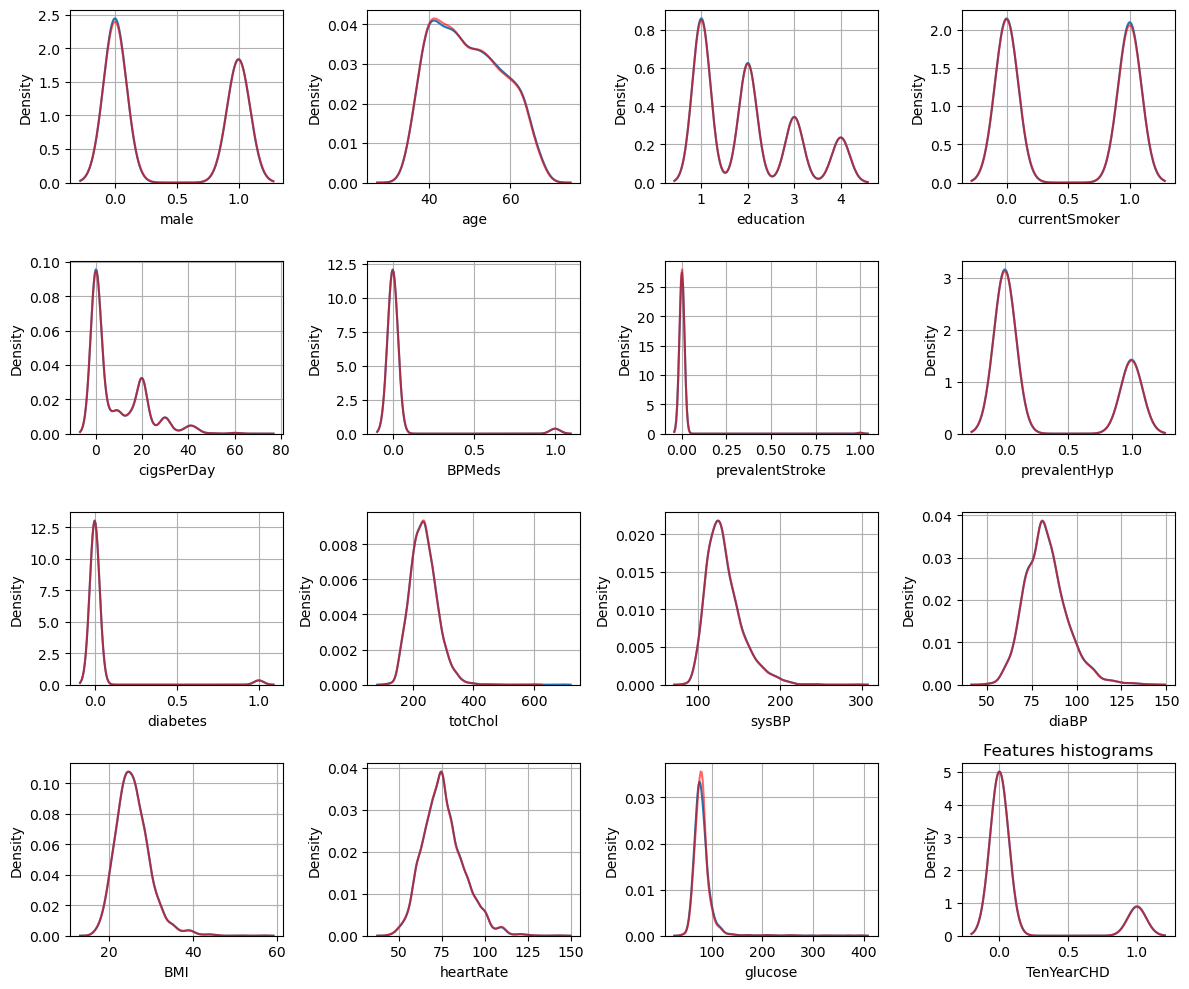

In [10]:
r = 4
c = 4
it = 1
plt.figure(figsize=(12,10))
for i in df.columns:
    plt.subplot(r,c,it)
    sns.kdeplot(df[i])
    sns.kdeplot(nonaknn[i], color='r', alpha=0.6)
    plt.grid()
    it+=1
plt.title('Features histograms')
plt.tight_layout()
plt.show()

As we can see, there's no a big difference in the distribution of the data after cleaning it up.

Let's check for outliers in the data in the numerical variables.

In [11]:
nonCat = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
nonaknn[nonCat].describe()

,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000
mean,9.023314,236.597393,132.225119,82.865756,25.773387,75.873903,81.852682
std,11.917057,44.021011,21.944182,11.881708,4.079551,12.086113,22.890668
min,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000
50%,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,79.000000
75%,20.000000,263.000000,143.500000,89.500000,27.990000,83.000000,85.000000
max,70.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


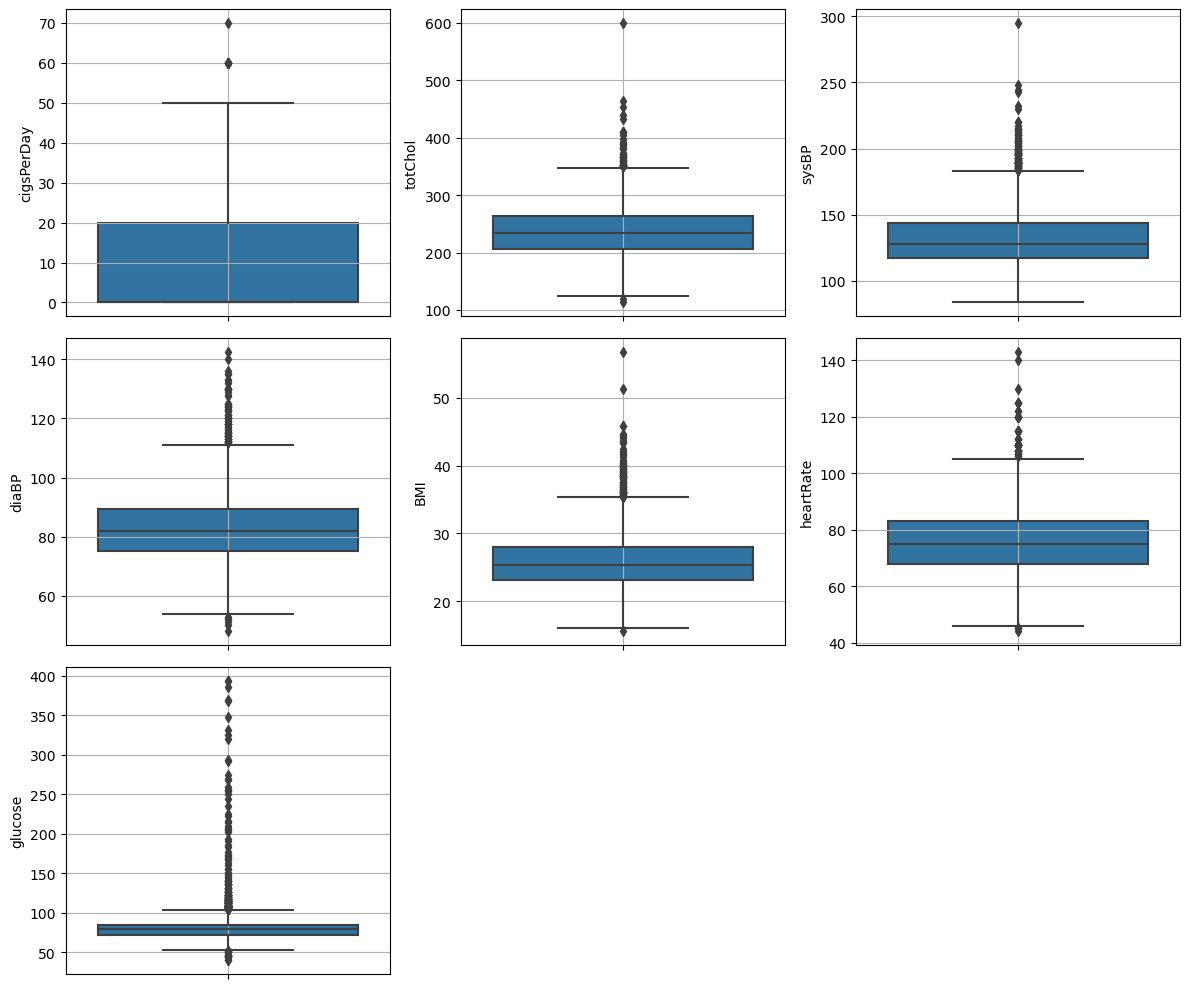

In [13]:
it = 1
plt.figure(figsize=(12,10))
for i,col in enumerate(nonaknn[nonCat].columns,1):
    plt.subplot(3,3,it)
    sns.boxplot(data=nonaknn,y=col)
    plt.grid()
    it += 1
plt.tight_layout()